## Assignment 6B

### Problem 1 (50 points)
Laplace’s Equation in a Box.

An empty square box has conducting walls, $1\text{m}$ each. All of the walls are grounded at $0$ statvolts, except for the wall at the top, which is at voltage $V = 1$ statvolt.

**Note:** The small gaps between the top wall and the others in the figure indicate that they are insulated from one another, but you can assume that these gaps have negligible width in your calculation.

For the two-dimensional case, solve Laplace’s equation for the electrostatic potential $\phi$, subject to boundary conditions $\phi=V$ on the top wall and $\phi=0$ on the other walls.


#### Problem 1.A
Write a program to compute the solution to this problem using the combined overrelaxation/Gauss–Seidel method.

Use the following parameters: The grid spacing $a = 1\text{cm}$, so there are 100 grid points on each side (101 if we count the points at both the beginning and the end).

Continue iterating until the value of the electric potential changes by no more than $\delta=10^{−6}$ statvolt at any grid point.

In [1]:
import numpy as np

# Define the iterate function
def iterate(potential: np.ndarray, tolerance: float|int, max_iterations: int|None=None) -> None:
    for _ in range(max_iterations):
        old_potentials = potential.copy()
        N, M = potential.shape
        for i in range(1, N-1):
            for j in range(1, M-1):
                potential[i, j] = (1+ω) * 0.25 * (
                    potential[i-1, j] + potential[i+1, j] + 
                    potential[i, j-1] + potential[i, j+1]
                ) - ω * potential[i, j]
        if np.all(np.abs(potential - old_potentials) < tolerance):
            print(f"Converged in {_+1} iterations")
            break
    else:
        print("Max Iterations Reached")

# Problem Parameters
L  = 100          # cm, Length of the box
Δx = 1            # cm, Grid Spacing
N  = int(L/Δx)+1  # Number of Grid Points
ω  = 0.95         # Relaxation Parameter

# Create the potential array
box_potential = np.zeros((N, N))
box_potential[0,:] = 1  # Set the top to 1 statvolt (in SI units)

# Iterate the potential array steps
iterate(box_potential, 1e-6, 1000)

Converged in 254 iterations


#### Problem 1.B
Experiment with different values of the overrelaxation parameter $\omega$ to find which value gives the fastest solution. Report the optimal value of $\omega$ among those you tried.

**Note:** Larger values generally speed up convergence, but the calculation may become unstable if $\omega$ is too large.

Here's a table of my results (5000 steps max, 1e-4 tolerance):
| $\omega$ |   time   | result |
| -------- | -------- | ------ |
| $1.0$    | 39.1s    | Very very broken |
| $0.99$   | 7.2s     | Stable! |
| $0.98$   | 3.3s     | Stable! |
| $0.97$   | 2.3s     | Stable! |
| $0.96$   | 1.5s     | Stable! |
| $0.95$   | 1.5s     | Stable! |
| $0.85$   | 2.3s     | Stable! |
| $0.75$   | 3.5s     | Stable! |
| $0.50$   | 6.6s     | Stable! |
| $0.25$   | 9.2s     | Stable! |
| $0.00$   | 11.2s    | Stable! |

The fastest convergence was somewhere around $\omega\approx0.95$.

#### Problem 1.C
Make a density plot of the final solution.

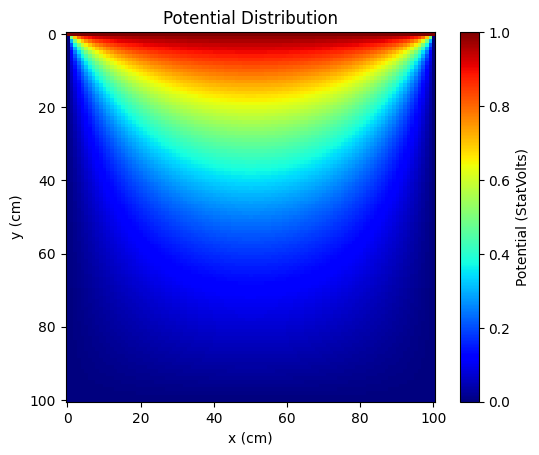

In [2]:
# Plot the potential array
import matplotlib.pyplot as plt
plt.imshow(box_potential, cmap='jet', interpolation='nearest')
plt.title('Potential Distribution')
plt.xlabel('x (cm)')
plt.ylabel('y (cm)')
cbar = plt.colorbar()
cbar.set_label('Potential (StatVolts)')
plt.show()

### Problem 2 (50 points)
Consider a model of an electronic capacitor consisting of two flat metal plates enclosed in a square metal box. For simplicity, model the system in two dimensions.

The walls of the box are at $0$ statvolts, while the two capacitor plates (with negligible thickness) are at fixed potentials of $+1$ statvolt and $−1$ statvolt, respectively.

For the two-dimensional case, solve Laplace’s equation for the electrostatic potential $\phi$ with boundary
conditions of $\phi=+1$ statvolt on the positive plate, $\phi=−1$ statvolt on the negative plate, and $\phi=0$
on the walls.

#### Problem 2.A
Write a program, or modify the previous one, to solve Laplace’s equation for this problem on a grid of $100\times100$ points. Calculate the potential at each grid point to a precision of $10^{−6}$ statvolt.

In [3]:
import numpy as np

# Define the iterate function
def iterate(potential: np.ndarray, tolerance: float|int, max_iterations: int|None=None) -> None:
    for _ in range(max_iterations):
        old_potentials = potential.copy()
        N, M = potential.shape
        for i in range(1, N-1):
            for j in range(1, M-1):
                if (30 <= i and i < 70) and j == 20:
                    continue
                if (30 <= i and i < 70) and j == 80:
                    continue
                potential[i, j] = (1+ω) * 0.25 * (
                    potential[i-1, j] + potential[i+1, j] + 
                    potential[i, j-1] + potential[i, j+1]
                ) - ω * potential[i, j]
        if np.all(np.abs(potential - old_potentials) < tolerance):
            break
    else:
        print("Max Iterations Reached")

# Problem Parameters
L  = 100         # cm, Length of the Rod
Δx = 1           # cm, Grid Spacing
N  = int(L/Δx)+1 # Number of Grid Points
ω  = 0.95        # Relaxation Parameter

# Create the potential array
box_potential = np.zeros((N, N))
box_potential[30:70,20] = +1
box_potential[30:70,80] = -1

# Iterate the potential array steps
iterate(box_potential, 1e-6, 5000)

#### Problem 2.B
Make a density plot of the resulting potential.

In [1]:
# Plot the potential array
import matplotlib.pyplot as plt
plt.imshow(box_potential, cmap='jet', interpolation='nearest')
plt.title('Potential Distribution')
plt.xlabel('x (mm)')
plt.ylabel('y (mm)')
plt.gca().invert_yaxis()
cbar = plt.colorbar()
cbar.set_label('Potential (StatVolts)')
plt.show()

NameError: name 'box_potential' is not defined